In [3]:
# Cell 1: Setup
from data_loader import *
import matplotlib.pyplot as plt
import numpy as np


In [4]:

# Cell 2: Random Bubble Selection
bubble_id_to_analyze = np.random.choice(df_corrected["id"].unique())
bubble_data = df_corrected[df_corrected["id"] == bubble_id_to_analyze].sort_values("timestep").copy()

print(f"Analyzing bubble #{bubble_id_to_analyze}")
print(f"Lifetime: {len(bubble_data)} timesteps")


Analyzing bubble #264
Lifetime: 726 timesteps


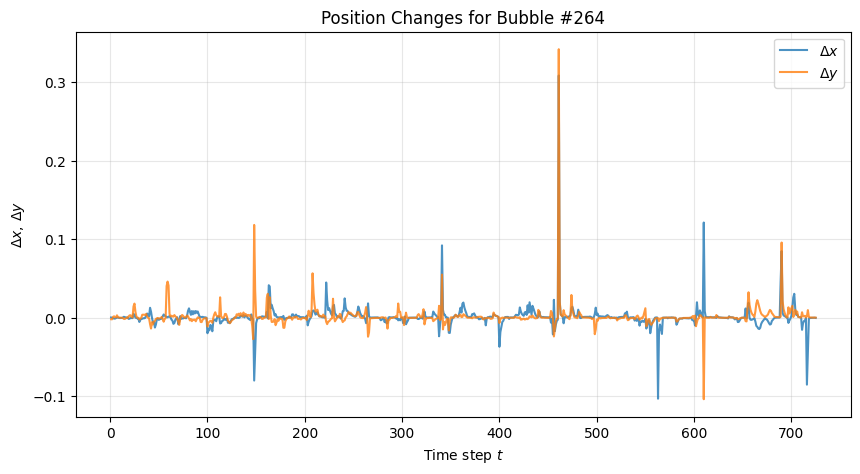

Mean Δx: 0.000938, Std: 0.016014
Mean Δy: 0.001520, Std: 0.015969


In [5]:

# Cell 3: Position Changes
if len(bubble_data) > 1:
    x = bubble_data["x"].to_numpy()
    y = bubble_data["y"].to_numpy()
    
    changes_x = np.diff(x)
    changes_y = np.diff(y)
    
    step_numbers = np.arange(1, len(changes_x) + 1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(step_numbers, changes_x, label=r'$\Delta x$', alpha=0.8)
    plt.plot(step_numbers, changes_y, label=r'$\Delta y$', alpha=0.8)
    plt.xlabel(r'Time step $t$')
    plt.ylabel(r'$\Delta x, \, \Delta y$')
    plt.title(f'Position Changes for Bubble #{bubble_id_to_analyze}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Mean Δx: {np.mean(changes_x):.6f}, Std: {np.std(changes_x):.6f}")
    print(f"Mean Δy: {np.mean(changes_y):.6f}, Std: {np.std(changes_y):.6f}")


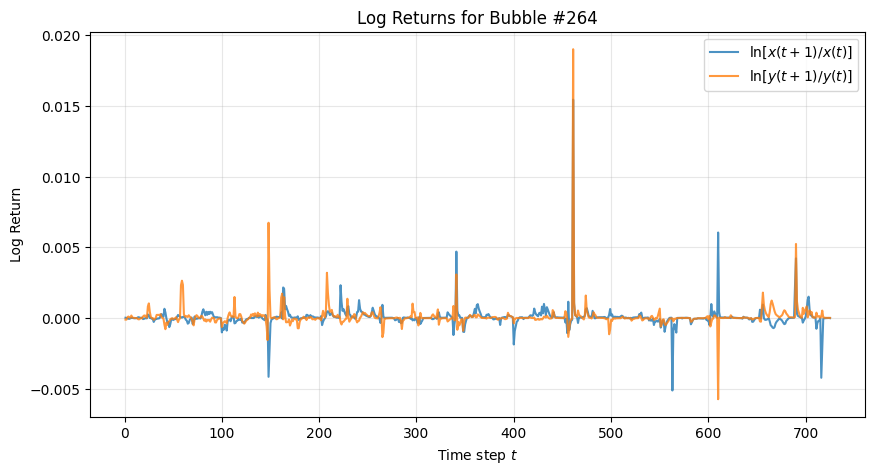

In [6]:

# Cell 4: Log Returns
if len(bubble_data) > 1:
    shifted_x = x + 1e-6
    shifted_y = y + 1e-6
    
    log_ret_x = np.log(shifted_x[1:] / shifted_x[:-1])
    log_ret_y = np.log(shifted_y[1:] / shifted_y[:-1])
    
    plt.figure(figsize=(10, 5))
    plt.plot(step_numbers, log_ret_x, label=r'$\ln[x(t+1)/x(t)]$', alpha=0.8)
    plt.plot(step_numbers, log_ret_y, label=r'$\ln[y(t+1)/y(t)]$', alpha=0.8)
    plt.xlabel(r'Time step $t$')
    plt.ylabel(r'Log Return')
    plt.title(f'Log Returns for Bubble #{bubble_id_to_analyze}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

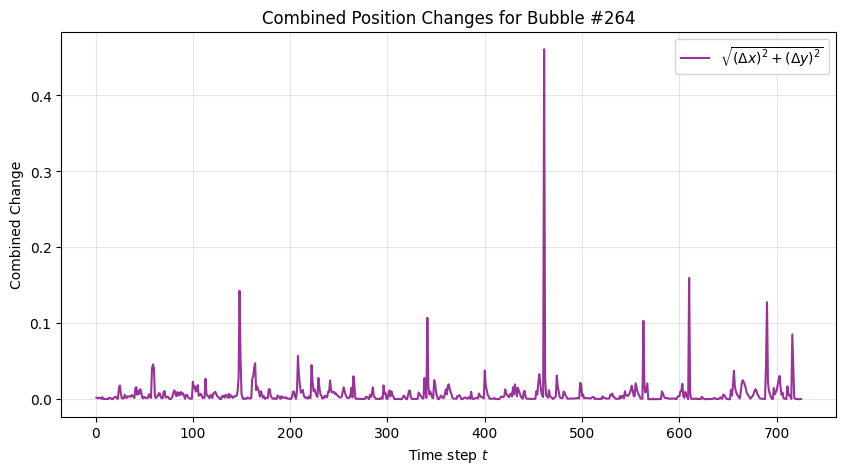

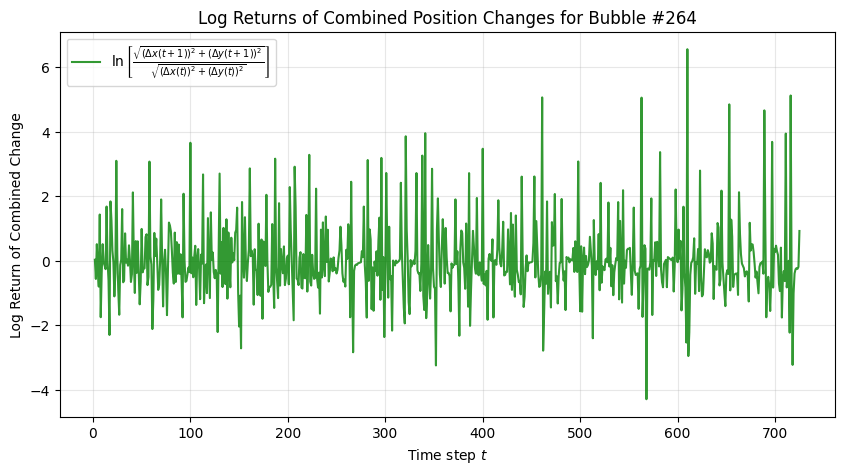

In [ ]:
# Cell 5: Combine x and y Changes

combined_changes = np.sqrt(changes_x**2 + changes_y**2)

plt.figure(figsize=(10, 5))
plt.plot(step_numbers, combined_changes, label=r'$\sqrt{(\Delta x)^2 + (\Delta y)^2}$', color='purple', alpha=0.8)
plt.xlabel(r'Time step $t$')
plt.ylabel(r'Combined Change')
plt.title(f'Combined Position Changes for Bubble #{bubble_id_to_analyze}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


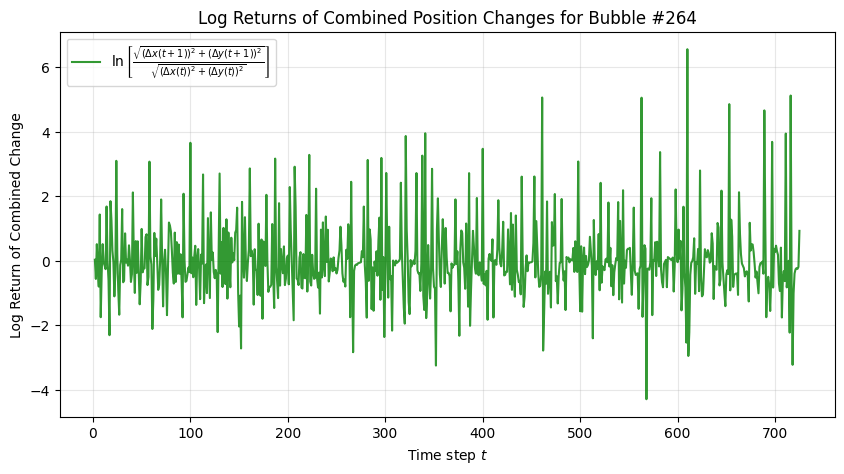

In [12]:
# Cell 4: Log Returns of Combined Changes
if len(bubble_data) > 1:
    # Calculate combined position changes
    combined_changes = np.sqrt(changes_x**2 + changes_y**2)
    
    # Calculate log returns of combined changes
    log_ret_combined = np.log(combined_changes[1:] / combined_changes[:-1])

    plt.figure(figsize=(10, 5))
    plt.plot(step_numbers[1:], log_ret_combined, label=r'$\ln\left[\frac{\sqrt{(\Delta x(t+1))^2 + (\Delta y(t+1))^2}}{\sqrt{(\Delta x(t))^2 + (\Delta y(t))^2}}\right]$', color='green', alpha=0.8)
    plt.xlabel(r'Time step $t$')
    plt.ylabel(r'Log Return of Combined Change')
    plt.title(f'Log Returns of Combined Position Changes for Bubble #{bubble_id_to_analyze}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()